# Time Series Forecasting with RNN

## 1. Introduction

Let's start this module with a brief definition about what a Time Series is. Then we will see what an RNN (Recurrent Neural Network) is and how it learns to do a simple time series forecast.

A time series can be defined as a succession of data measured at certain moments and ordered chronologically. For example, when we measure the temperature and write it down  sequentially with its timestamp, we are doing a time series, or when we look at a ball moving and we write down its position along the time, that is a time series too.

The analysis of time-series data, as opposed to other types of data, shows how variables change over time. So it can be said that the data contains interdependencies over time.

Time series analysis typically requires a large number of data points to ensure consistency and reliability. It facilitates the discovery of trends, patterns or seasonal dependencies. It could be usefull to predict future events or the evolution of a metric.

Some examples of time series could be: weather data, rainfall measurements, heart rate monitoring, quarterly sales, stock prices,...

The time series forecasting problem analyzes patterns in the past data to make predictions about the future. Time series are usually used to show some specific characteristics such as trends or seasonality.

The main characteristics of a time series are:
1. <b>Temporal order</b>: The data in a time series is ordered based on time. The sequence of the data is important, and the temporal location of each data point is crucial to understanding the time series.
2. <b>Temporal dependence</b>: Data points in a time series are temporally related, meaning that the value of one data point may depend on the values of previous data points.
3. <b>Temporal variability</b>: Time series can be stationary or non-stationary. Stationary time series have a constant mean and variance that do not change over time, while non-stationary time series have a mean and variance that change over time.
4. <b>Trend</b>: A trend is a general pattern in the data that shows a systematic change in one direction over time.
5. <b>Seasonality</b>: Seasonality refers to repetitive patterns in the data that occur at regular intervals.
6. <b>Noise</b>: Noise in a time series refers to random fluctuations in the data that are not related to trends or seasonality.

Understanding these characteristics is important for analyzing and modeling time series data, and it is fundamental to apply time series modeling and prediction techniques

Let's do some exercises over some financial data. Let's take the daily prices for Apple stock from 2020-1-1 to 2023-1-1 and study their characteristics.

We are going to use Yahoo Finance library, so you will need to have it installed (!pip install yfinance), and other standard libraries like pandas or matplotlib to plot the data.

In [17]:
%pip install yfinance
%pip install seaborn
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


     ---------------------------------------- 9.2/9.2 MB 16.3 MB/s eta 0:00:00
     ---------------------------------------- 233.8/233.8 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

# This is needed in jupyter notebook to see the plots
%matplotlib inline  

### Data collection
The first step in every time series analysis is to load the data into a structure where we can handle them easily. In this case we are going to use pandas dataframe.

Since we are going to use past data of the price stock, we are going to load the recolected data from yahoo finance instead of programing our own data collector and to have to wait to have enough data for the analysis. As you can guess, this is a very project dependant step and the data collection will depended very much of how we can get the data.

In [19]:
data = yf.download("AAPL", start="2020-01-1", end="2023-01-1", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [20]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449409,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735313,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314888,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143898,132079200
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400


Now we have a pandas dataframe with one line per day with the open price, highest price in the day, lowest price in the day, close price, adjusted close price and the volume moved during the day. So, we have six time series (one per column).

Today we are going to work only with the close price, so, in order to work easily, let's store only this series.

In [21]:
data = data[['Close']]

A good practice is to view the data in a plot to quickly and visually detect possible inconsistencies

<strong> Exercise T1:</strong> Complete the code to plot the data stored in the Close column.

<strong>Hint:</strong> use function plt.plot()

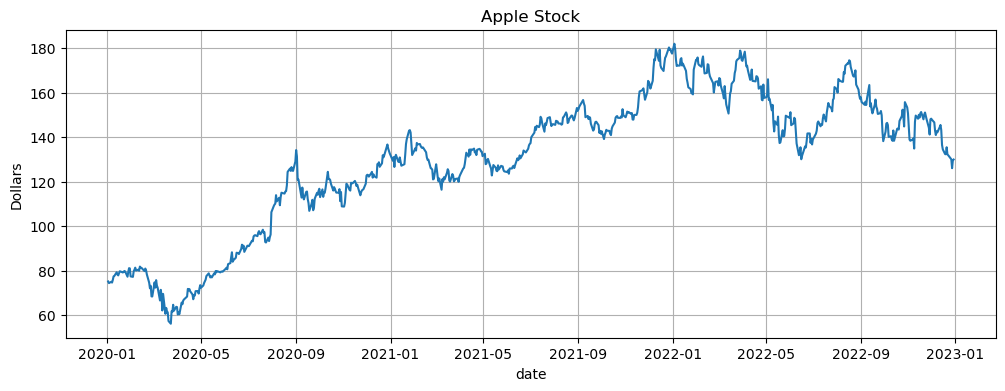

In [22]:
# Let's see the data in a plot.
plt.figure(figsize=(12,4))
plt.grid(True)
plt.xlabel("date")
plt.ylabel("Dollars")
plt.title("Apple Stock")

### Your code starts here ###



### Your code ends here ###
plt.show()

At a first glance, it seems to be right.

Let's do ourselves some checks:
1. In time series we have to have our data in chronological order and the time stamps should be equidistant. We have seen that we have our data ordered, so let's check if it is equaly distant or not. If they are not equidistant, we'll have to think if it is possible to complete or resample our data.

In [23]:
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=756, freq=None)

We have our timestamp data in datetime64[ns] data type, so we can work with time functions without problems and we don't need to convert them.

In case they were given to us in any other format, string format for example, we can use functions like pd.to_datetime to convert them to the correct data type.

So, let's check the data time distance.

We are going to calculate the distance between one index and the next one and group these differences in order to count them:

In [24]:
days = data.index
days_bet = data.index.to_series().diff().dt.days
print("Diff days: ", days_bet.value_counts())

Diff days:  1.0    596
3.0    133
4.0     23
2.0      3
Name: Date, dtype: int64


### Handling Missing Values

We can see that we have samples with a distance of 1 day, 2 days, 3 days and 4 days.
If you check deeper in the data, you can see that, in this specific time series, this is due to weekends and holidays when the stock market is closed, so in this case, we can put the last closing price in the remaining days.

This is a data dependant task. For example, in other time series, it's tipical to add the intermediate data by doing an interpolation of the nearest values or, for example, if we had selected open price instead of close price, it could be better to fill the remaining days with the next open price instead of the last one or the last closing price. Take your time to analise the best way to fill the missing data because it could be crucial at the end of the project. If you filled this data with not realistic ones, it could break any posible pattern that the data could have there.

Here you have some strategies to fill missing data:

- Option 1: Fill NaN with Outlier or Zero.
- Option 2: Fill NaN with Mean Value.
- Option 3: Fill NaN with Last Value with .ffill().
- Option 4: Fill NaN with Linearly Interpolated Value with .interpolate().
- Option 5: any other that could work better in your specific case.

Of course, these can be applied after trying to get the real missing data and understanding the meaning of your data and what strategy could be the more realistic.

So let's complete our dataset to have an equally spaced dataset.

In [25]:
data_clean = data.resample('D').agg({'Close':'last'})  # This sentence resamples our dataset to a daily sample and puts the last value of the day.
# In this case we use it to have one record per day unless we'll have NaN value for the new days.
data_clean = data_clean.ffill() # This sentence fills each NaN value with the last known data.

This is a very simple example, but if, for example, you were using all the data downloaded from Yahoo Finance (open, close, high, low and volume) and you want to use weekly data, you can resample all of them at once with a sentence like:
- data.resample('W').agg({'close':'last', 'open':'first', 'high': 'max', 'low': 'min', 'volume':'sum'})

Now  we can check that all our data is equally spaced.

<strong> Exercise T2:</strong> Confirm that all data is equally spaced.

<strong>Hint:</strong> take a look at two previous code cells.

In [26]:
### Your code starts here ###


### Your code ends here ###
print("Diff days: ", days_bet.value_counts())

Diff days:  1.0    1093
Name: Date, dtype: int64


Great! now we have a 1 day of distance between each sample.

In [27]:
# We can check for example the last 20 items:

check = pd.DataFrame([])
check['Clean'] = data_clean[:20]
check['Original'] = data[:20]
print(check)

                Clean   Original
Date                            
2020-01-02  75.087502  75.087502
2020-01-03  74.357498  74.357498
2020-01-04  74.357498        NaN
2020-01-05  74.357498        NaN
2020-01-06  74.949997  74.949997
2020-01-07  74.597504  74.597504
2020-01-08  75.797501  75.797501
2020-01-09  77.407501  77.407501
2020-01-10  77.582497  77.582497
2020-01-11  77.582497        NaN
2020-01-12  77.582497        NaN
2020-01-13  79.239998  79.239998
2020-01-14  78.169998  78.169998
2020-01-15  77.834999  77.834999
2020-01-16  78.809998  78.809998
2020-01-17  79.682503  79.682503
2020-01-18  79.682503        NaN
2020-01-19  79.682503        NaN
2020-01-20  79.682503        NaN
2020-01-21  79.142502  79.142502


### Resampling

Sometimes, it is a good idea to work with resampled data in order to reduce the data noise or to increase our samples.

There are two types of resampling:
- Upsampling: when the frecuency of samples is increased (e.g. from weeks to days)
- Downsampling: when the frecuency of samples is decreased (e.g. from days to weeks).

Upsampling could be a strategy of data augmentation and it could be useful to have more information, but it must be used carefully, because most of the times, we don't have the real data and filling them can cause paterns that are not real.

Downsampling could be the most standard resampling strategy used in this type of projects. In this case, it could be useful to reduce the noise in data, to have equidistant samples, to adecuate our data to the forecast of interest...

As we have seen before, .resample() can be used for downsampling easily.

Let's see some examples over our Apple stock time series:

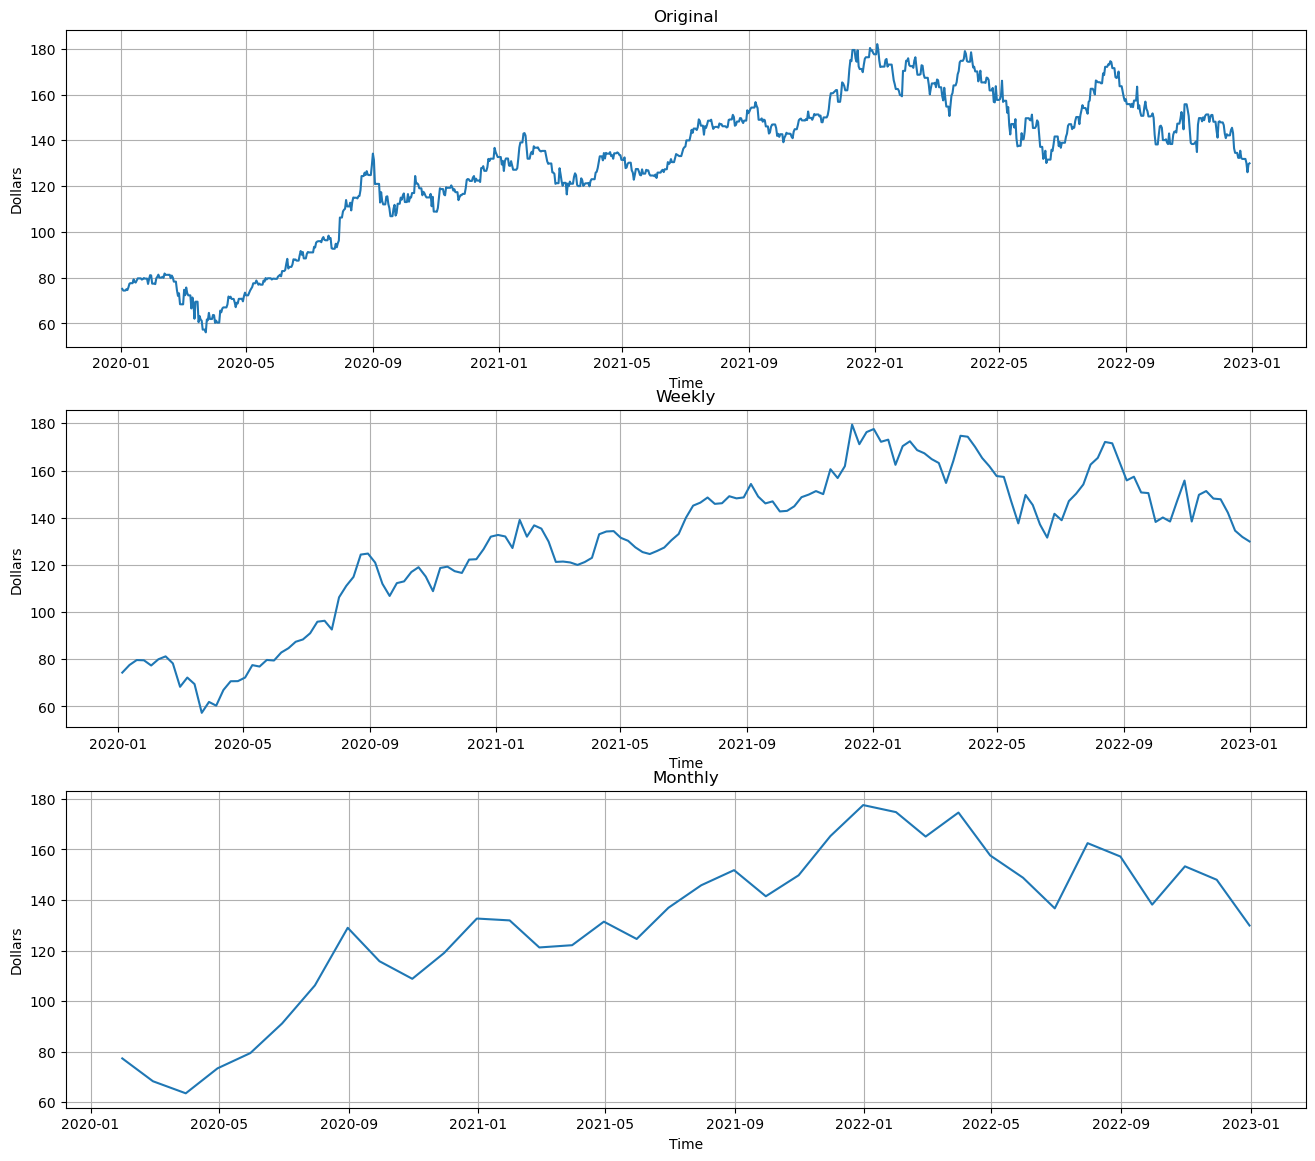

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(16,14))
ax[0].plot(data_clean.Close)
ax[0].set_title('Original')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Dollars')
ax[0].grid(True)

# Resample weekly
data_tmp = data_clean.resample('W').agg({'Close':'last'})
ax[1].set_title('Weekly')
ax[1].set_xlabel('Time')
ax[1].plot(data_tmp)
ax[1].set_ylabel('Dollars')
ax[1].grid(True)

# Resample monthly
data_tmp = data_clean.resample('M').agg({'Close':'last'})
ax[2].set_title('Monthly')
ax[2].set_xlabel('Time')
ax[2].plot(data_tmp)
ax[2].set_ylabel('Dollars')
ax[2].grid(True)

plt.show()

### Stationarity

Time-series models like ARIMA, assume that the data is stationary.

As we showed before, stationarity describes that the time-series has:

- constant mean and it is not time-dependent
- constant variance and it is not time-dependent
- constant covariance and it is not time-dependent

If a time series has a stationary behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.


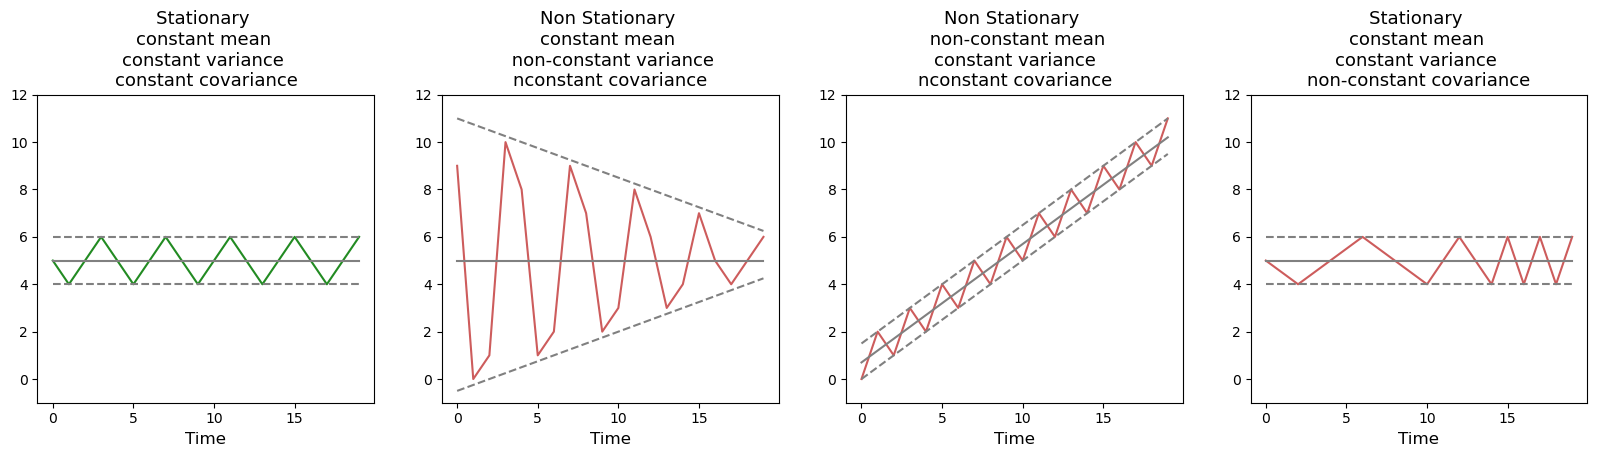

In [29]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
ax[0].plot(stationary, color='forestgreen')
ax[0].plot([5 for x in range(20)], color='grey')
ax[0].plot([6 for x in range(20)], color='grey')
ax[0].plot([4 for x in range(20)], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=13)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
ax[1].plot(nonstationary1, color='indianred' )
ax[1].plot([5 for x in range(20)], color='grey')
ax[1].plot([t*0.25-0.5 for t in range(20)], color='grey')
ax[1].plot([t*(-0.25)+11 for t in range(20)], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=13)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
ax[2].plot(nonstationary2, color='indianred' )
ax[2].plot([t*0.5+0.7 for t in range(20)], color='grey')
ax[2].plot([t*0.5 for t in range(20)], color='grey')
ax[2].plot([t*0.5+1.5 for t in range(20)], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=13)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
ax[3].plot(nonstationary3, color='indianred')
ax[3].plot([5 for t in range(20)], color='grey')
ax[3].plot([6 for t in range(20)], color='grey')
ax[3].plot([4 for t in range(20)], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=13)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=12)

Now we are going to check our data. Is our data stationary?

We can check it:
- visually: plot time series and check for trends or seasonality.
- using basic statistics: split time series and compare the mean and variance of each partition
- by statistical test: Augmented Dickey Fuller test

Let's start with the visual check:

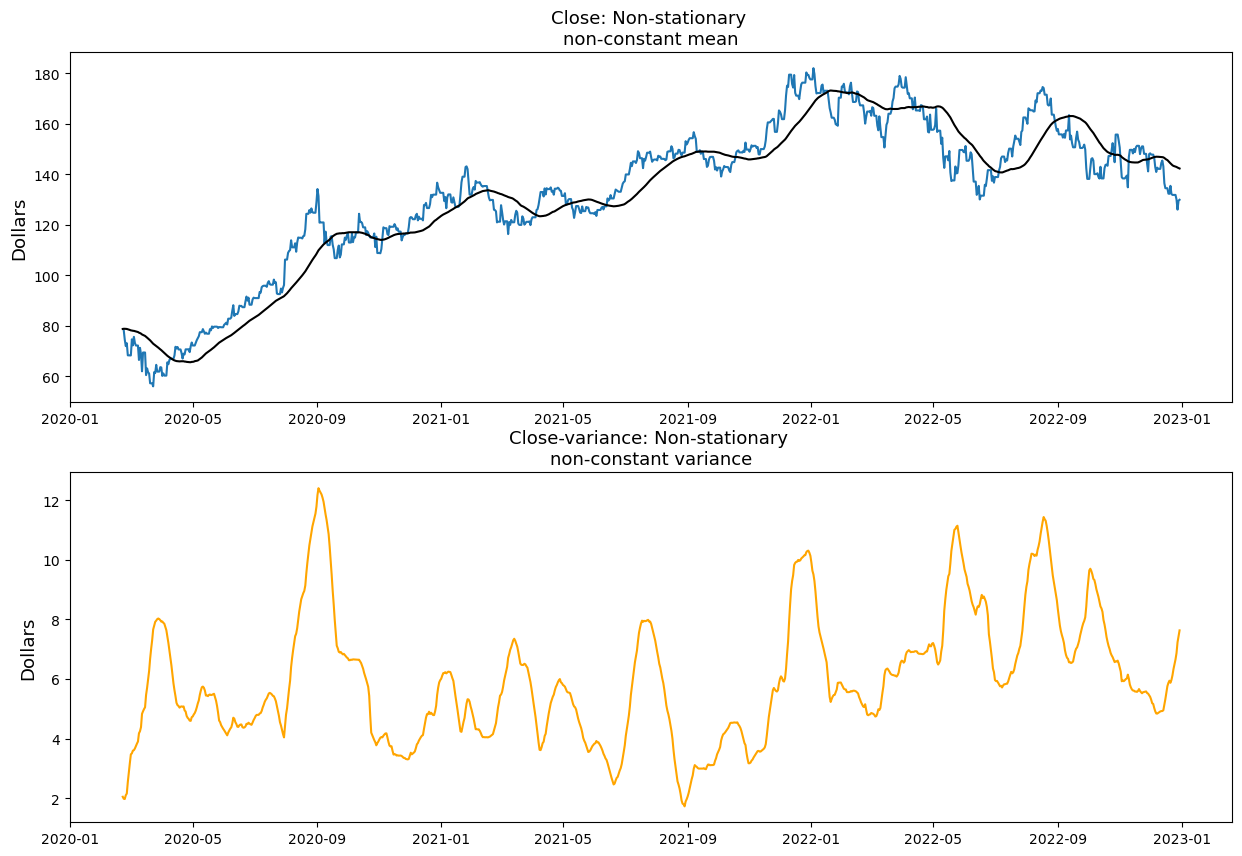

In [30]:
rolling_window = 52

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,10))

ax[0].plot(data_clean[rolling_window:])
ax[0].plot(data_clean.rolling(rolling_window).mean(), color='black', label='rolling mean')
ax[0].set_title('Close: Non-stationary \nnon-constant mean', fontsize=13)
ax[0].set_ylabel(ylabel='Dollars', fontsize=13)

ax[1].plot(data_clean.rolling(rolling_window).std(), color='orange', label='rolling mean')
ax[1].set_title('Close-variance: Non-stationary \nnon-constant variance', fontsize=13)
ax[1].set_ylabel(ylabel='Dollars', fontsize=13)

plt.show()

As you can see, we have taken a rolling window of 52 days (you can choose any other if you want) and we have calculated its mean and variance in order to check if they are constant or not.

It can be observed that the stock price has not a constant mean nor constant variance, so it's not stationary.

Let's check with the basic statistics too.

In this case, we are going to split the time series into two sections (you can make more partitions if you want) and check the mean and the variance:

<strong> Exercise T3:</strong> Calculate the mean and the variance of each half of the dataset.

<strong>Hint:</strong>
- calculate the middle position of the dataset (remember to convert to int!).
- use .mean() and .var() functions to calculate the mean and variance of each half.

In [31]:
num_partitions = 2


### Your code starts here ###


### Your code ends here ###

mean_test = pd.concat([partition1_mean, partition2_mean], axis=1)
mean_test.columns = ['Part 1 Mean', 'Part 2 Mean']

var_test = pd.concat([partition1_var, partition2_var], axis=1)
var_test.columns = ['Part 1 Variance', 'Part 2 Variance']

display(mean_test)
display(var_test)

,Part 1 Mean,Part 2 Mean
Close,106.380023,154.096234


,Part 1 Variance,Part 2 Variance
Close,578.315268,152.012162


Now we can check the histogram too.

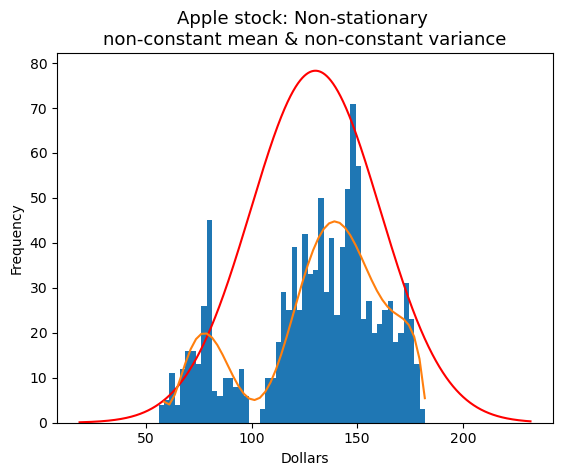

In [32]:
from scipy.stats import norm


x = plt.hist(data_clean.Close, bins=50)
plt.title('Apple stock: Non-stationary \nnon-constant mean & non-constant variance', fontsize=13)
plt.xlabel('Dollars')
plt.ylabel('Frequency')

x1 = np.arange(x[1][1]-40, x[1][-1]+50, 0.001)
plt.plot(x1, norm.pdf(x1, data_clean.Close.mean(), data_clean.Close.std())*6000, color='red')

p = np.poly1d(np.polyfit(x[1][1:], x[0],8))
plt.plot( x[1][1:], p(x[1][1:]))
plt.show()


Since we are looking at the mean and variance, we are expecting that the data conforms to a Gaussian distribution in case of stationarity.

In the above plot we can see the data histogram (blue), the adjusted polynomial of grade 8 (orange) and the gaussian distribution (red) for the mean and variance of the data.

We can clearly see that data doesn't have a Gaussian behavior.

And now, let's check through the Augmented Dickey-Fuller (ADF) test. This is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

- Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).
- Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to reject the null hypothesis:

The null hypothesis can be rejected if the p-value is below a set significance level. The default significance level is 5%

- p-value > significance level (default: 0.05): Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= significance level (default: 0.05): Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

On the other hand, the null hypothesis can be rejected if the test statistic is less than the critical value.

- ADF statistic > critical value: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- ADF statistic < critical value: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Let's check our data (remember to install statsmodels in your environment: "!pip install statsmodels").

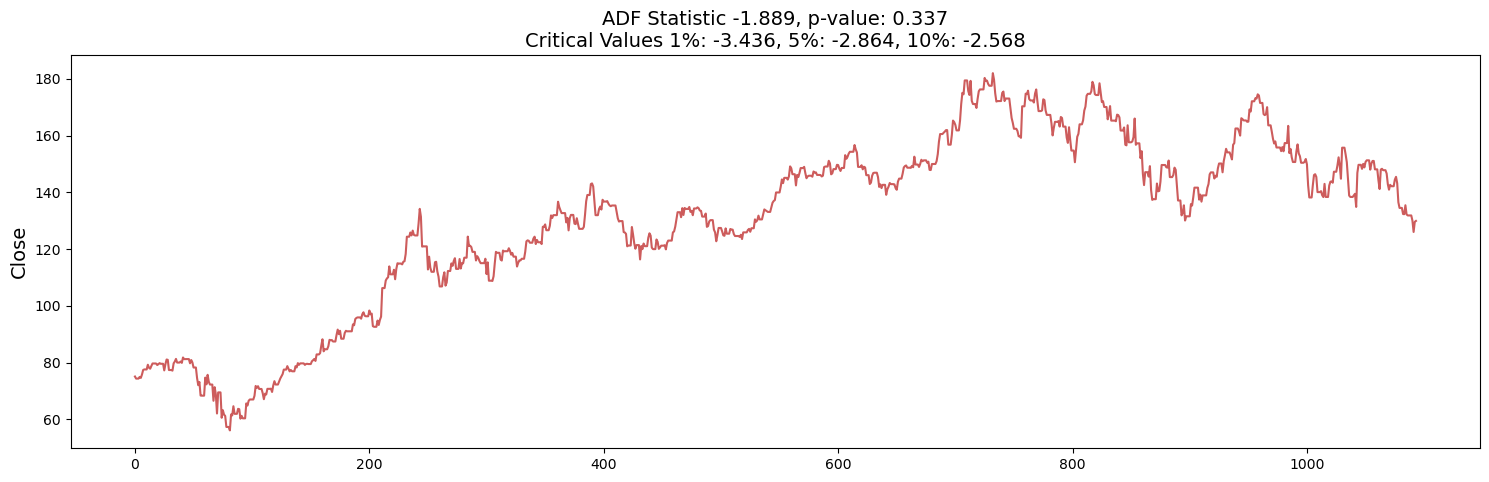

In [33]:
from statsmodels.tsa.stattools import adfuller

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    r = adfuller(series)
    sig_level = 0.05
    adf_stat = r[0]
    p_val = r[1]
    crit_val_1 = r[4]['1%']
    crit_val_5 = r[4]['5%']
    crit_val_10 = r[4]['10%']

    if (p_val < sig_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < sig_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < sig_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    ax.plot(series, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(data_clean.Close.values, 'Close', ax[0])

f.delaxes(ax[1])
plt.tight_layout()
plt.show()


We can see that p-value is greater than the significance level and the ADF statistic is greater than the critical value for 10%, so we can say that this time series is not stationary.

If the data is not stationary and we want to use a model that needs this characteristic, we can try to apply some techniques to transform them.

The two most common methods to transform time series are:
- Transformation: e.g log() or square root to stabilize non-constant variance.
- Differencing: subtracts the current value from the previous. This will help to eliminate the trend.

The most important characteristic that any transformation that we try to do must have, is that it must be able to be reverted.

Let's start with the transformation to logarithm:

<strong> Exercise T4:</strong> Calculate the log and store it into a new column named "Close_log" in the data_clean dataframe.

<strong>Hint:</strong> 
- Use np.log function.
- remember that negative values are errors, so, before calculating the logarithm, you will have to put all values in positive (you can use abs function). In this case, there is no problem because all our data is positive, but take it into account if you do this with another time series that could have this type of negative values.

In [34]:
# Log Transform of absolute values
# (Log transform of negative values will return NaN)

### Your code starts here ###



### Your code ends here ###


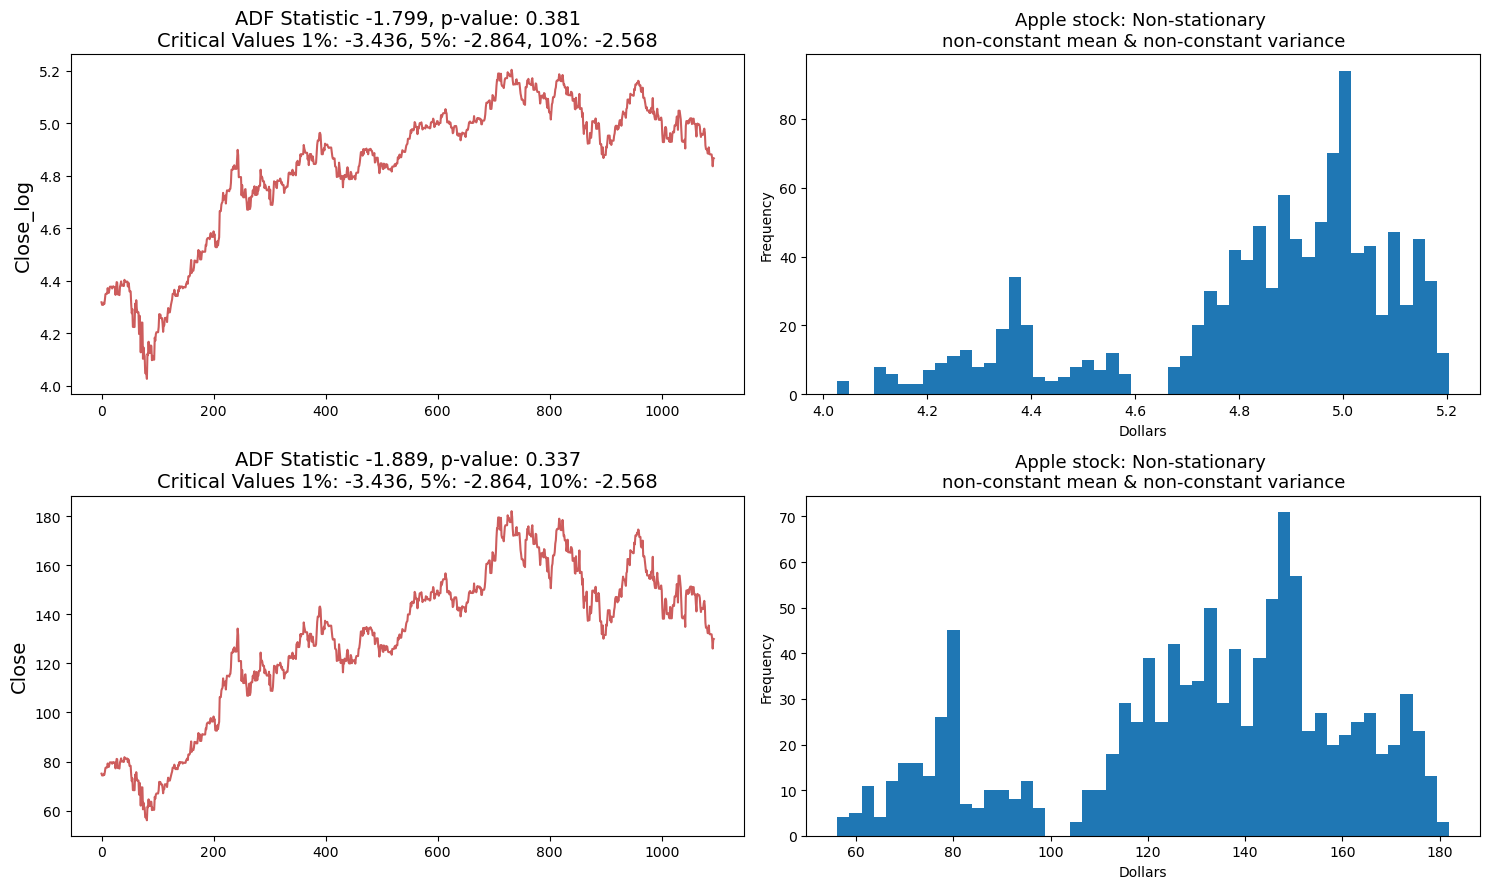

In [35]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

x = ax[0,1].hist(data_clean.Close_log, bins=50)
ax[0,1].set_title('Apple stock: Non-stationary \nnon-constant mean & non-constant variance', fontsize=13)
ax[0,1].set_xlabel('Dollars')
ax[0,1].set_ylabel('Frequency')

visualize_adfuller_results(data_clean.Close_log.values, 'Close_log', ax[0,0])

x = ax[1,1].hist(data_clean.Close, bins=50)
ax[1,1].set_title('Apple stock: Non-stationary \nnon-constant mean & non-constant variance', fontsize=13)
ax[1,1].set_xlabel('Dollars')
ax[1,1].set_ylabel('Frequency')

visualize_adfuller_results(data_clean.Close.values, 'Close', ax[1,0])

#f.delaxes(ax[1,0])
#f.delaxes(ax[1,1])
plt.tight_layout()
plt.show()


And now we can do the differencing. It could be done for different orders:
- First order differencing: linear trends. $z_i = y_i - y_{i-1}$
- Second order differencing: quadratic trends. $z_i = (y_i - y_{i-1}) - (y_{i-1} - y_{i-2})$
- ...

<strong> Exercise T5:</strong> Calculate the first order difference and the second order difference and store them in the columns data_clean['Close_diff_1'] and data_clean['Close_diff_2'] respectively.

<strong>Hint:</strong> 
- Use np.diff function.

In [36]:
### Your code starts here ###



### Your code ends here ###

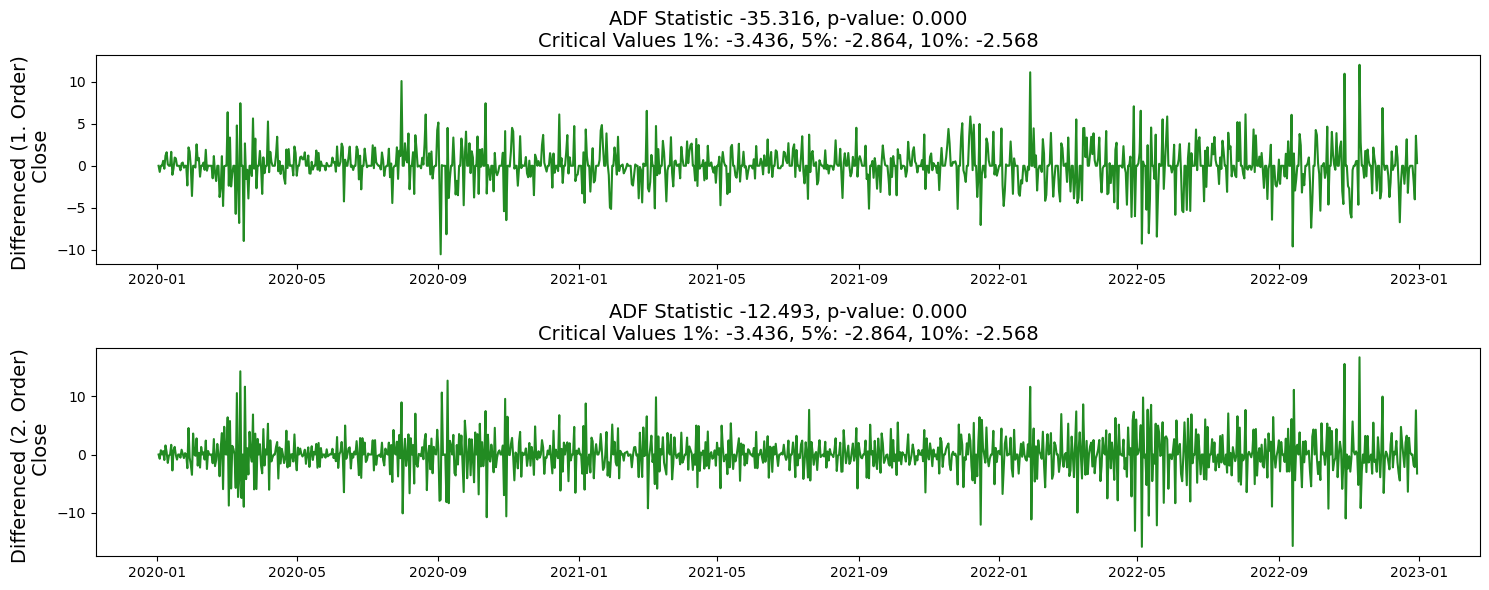

In [37]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 6))

visualize_adfuller_results(data_clean.Close_diff_1, 'Differenced (1. Order) \n Close', ax[0])
visualize_adfuller_results(data_clean.Close_diff_2, 'Differenced (2. Order) \n Close', ax[1])
plt.tight_layout()
plt.show()

Now we have a stationary time series (Differenced first order) and the transformation could be easily reverted if the first value before differencing is known. We can just use the function .cumsum() and add the first value of the original time series.

In [38]:
data_clean.Close.equals(data_clean.Close_diff_1.cumsum() + data_clean.Close.iloc[0])

True

So now, we can try to use any time series forecasting model that needs the stationary characteristic to work and after making a forecast, revert the prediction to the original time series value.



# RNN

OK, now we know what a time series is and what its main characteristics are. How can we work with it and machine learning, and how can we make a forecast?

Well, to work with time series there is a type of neural network that is specifically designed to handle sequential data, which is the Recurrent Neural Network (RNN). The <u>key feature of an RNN is that it has a loop in its architecture</u> that allows it <u>to maintain </u> an internal state or <u>memory of previous inputs</u>. This internal state allows the RNN to process inputs of variable length and to take into account the context of the input sequence when making predictions or generating output.

The loop in an RNN architecture enables the network to pass information from one step of the sequence to the next. At each step, the RNN takes as input the current input value, as well as the output from the previous step. The output from each step is then passed as input to the next step, allowing the network to maintain its internal state and incorporate information from the entire sequence.

RNNs are trained using a technique called backpropagation through time (BPTT), which is similar to the backpropagation algorithm used to train feedforward neural networks. BPTT updates the weights of the RNN by propagating the error back through the entire sequence.

RNNs have been successfully applied to a wide range of tasks, including natural language processing, speech recognition, time series prediction, and image captioning. Variations of RNNs, such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) networks, have also been developed to address the vanishing gradient problem and improve the performance of RNNs on long sequences.

Here we can see a RNN schema:

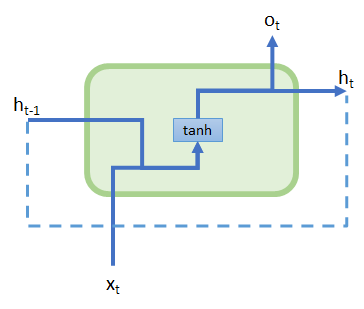

x<sub>t</sub>: input vector (m x 1). This will be the current value of the observed variable/s at the moment t (input).

h<sub>t</sub>: hidden layer vector (n x 1). This is the internal value that the network uses to try to summarize the past (memory).

o<sub>t</sub>: output vector (n x 1). This is the predicted vector at the moment t (output).

The sequence of data will be fed into the RNN cell sequentially and, as a function of the input and the hidden layer, it will be generating the output that corresponds to each period of time.

There exist a lot of architectures that can be implemented with an RNN cell:
* <b>one to one</b>: it's very similar to a standard neural network because it will have a fixed-size input and a fixed-size output.

* <b>one to many</b>: In this case, it will have a fixed-size input and a sequence of outputs. For example, a system where an image is the input and a sequence of words (for example, the description of the image) is the output.

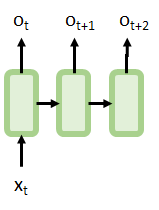

* <b>many to one</b>: a sequence in the input and one output. For example, a sentiment analysis system where, given a sentence as input, it is classified as positive or negative sentiment. Each period, X<sub>t</sub> is the next word in the sentence.

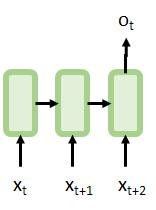

* <b>many to many</b>: in this case, a sequence is introduced and a sequence is got. For example, an automatic sentence translation: an RNN reads a sentence in English and then outputs a sentence in Spanish.

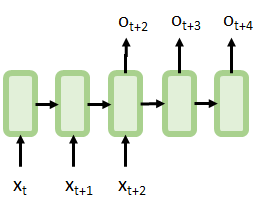

* <b>many to many</b>: Here you enter a sequence and you get a sequence while entering the input sequence. For example, we want to track a ball in a video stream. Each input is a frame of the video and the output are the coordinates where the ball is (this could be done with image object detection, but if you use an RNN you can take advantage of memory of where the ball was in the previous frame).

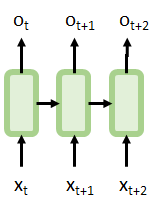

## 2. RNN. Programming an RNN network with PyTorch

### Prerequisites

This exercise assumes that you have a previous knowledge on Python, PyTorch and neural networks. We'll use matplotlib, numpy and pandas libraries too.

### First steps

Import all the libraries that we will need:

In [39]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## 3. Getting the time-series to learn

In this case we are going to test an RNN with a perfect stationary time series like sine function.
In the next lines, we are going to:
1. Create two tensors with the X-axis and the Y-axis of our data series.
2. Select our training dataset and test dataset.
3. Create the training dataset (we have to define a window with the historical data to show to the RNN and its target for each period of time).
4. Define the RNN class and the object.
5. Train the RNN network to learn from the data and to predict future data. During this learning phase, we will test the RNN network with the non viewed test dataset to see how it is learning and improve its performance.

And at the end, we will include some ideas to let the student play with the new knowledge.

Since this is an introductory lesson to RRN networks, let's forget the market stock time-series, and let's create a perfect time-series to work with. Of course, after this lesson, the student can try to apply all the new knowlgedge to the stock time-series.

Let's go...

### Creating the X-axis

The first step is to create an X-axis with a regular interval. We will define it as a PyTorch tensor.

<strong>Exercise R1</strong>. Using torch.linspace, complete the next code to create a torch tensor with values from 0 to 799.

<strong>Hint</strong>: torch.linspace(start, end, steps, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor (you can read more information at https://pytorch.org/docs/stable/generated/torch.linspace.html)

In [40]:
# Declaring a tensor x

### Your code starts here ###



### Your code ends here ###

Now let's introduce our target data. Since we are testing an RNN network, we are going to testit with a perfect stationary time series. And what could be better than a sine function to do it?

So, let's load our "observation" data into the y tensor:

In [41]:
# Creating a tensor y as a sin function of x
y = torch.sin(x*3.1416/40)

Let's have a look at our time-series:

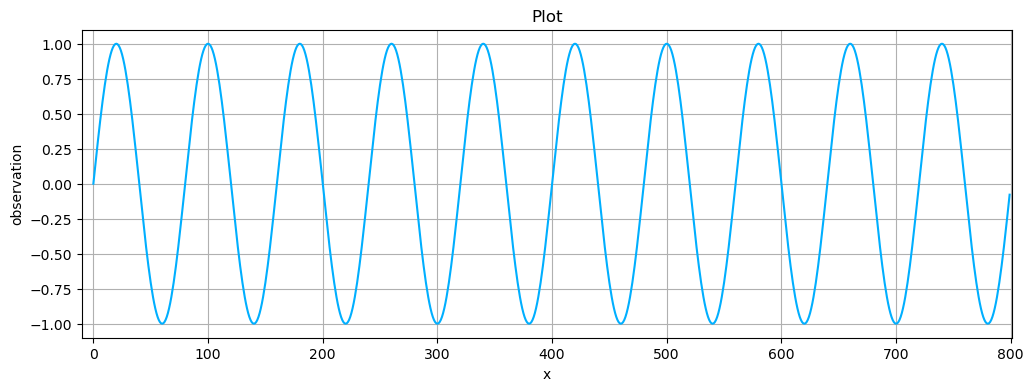

In [42]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("observation")
plt.title("Plot")
plt.plot(y.numpy(),color='#00afff')
plt.show()

It looks easy, right?

Let's see if our RNN network can find a way to predict the next value with a few of the last values (a window of data).

### Splitting the data in train/test set

Before starting, we have to split our data in two different datasets, one for training, and one for testing.

As you probably know from previous lessons, the training dataset will be used to train the network by showing the input data and the output that we want to see; then the network will adjust its internal parameters to do it better each loop. The test dataset will be used to test if it is doing its job well or not, so we won't let the network learn from this data.

In time-series, data can't be shuffled; it's important to keep the time or position information, so we have to use the first block of data to get the training dataset and the last block of data to get the test dataset.

Let's do it:

<strong>Exercise R2</strong>. Store the last "test_size" data in the test_set DataFrame and the rest in the train_set DataFrame.

In [43]:
test_size = 80

### Your code starts here ###

train_set = y[:-test_size]
test_set = y[-test_size:]

### Your code ends here ###

Ok, let's see how them look like:
(the blue line is the data to use to make the network learn, the orange one is the test data).

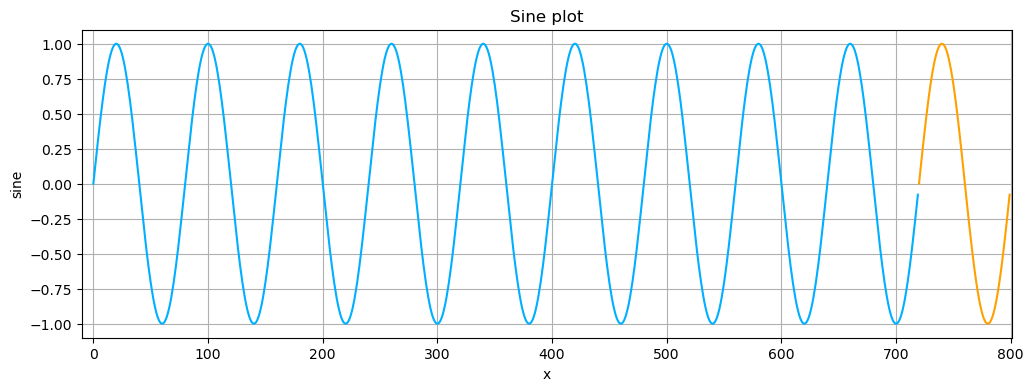

In [44]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sine")
plt.title("Sine plot")
plt.plot(train_set.numpy(),color='#00afff')
plt.plot(range(800-test_size,800),test_set.numpy(),color="#ffa000")
plt.show()

It looks good !!

### Create the training dataset

Now that we have our training dataset and our test dataset, it's time to prepare the data in the shape that the PyTorch RNN network wants it. That's a list of tuples for each sample with the input data as the first element and the target as the second element. 

The input data will be a tensor with the last M values of the time-series (M is the window size).

The target data will be a tensor with the expected output for the input data.

So let's create a function to prepare the data given as the first argument, and the window size as the second argument:

In [45]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

And now it's time to build the train_data list.

We are going to start with a window size of 80.

<strong>Exercise R3 :</strong> It's time to prepare the train_data DataFrame.

<strong>Hint :</strong>  Run the input_data function with the train_set and window_size parameters and store the result into train_data variable.

In [46]:
window_size = 80

### Your code starts here ###



### Your code ends here ###

len(train_data)

640

Ok, let's see a training data example:

In [47]:
train_data[0]

(tensor([ 0.0000e+00,  7.8459e-02,  1.5643e-01,  2.3345e-01,  3.0902e-01,
          3.8268e-01,  4.5399e-01,  5.2250e-01,  5.8779e-01,  6.4945e-01,
          7.0711e-01,  7.6041e-01,  8.0902e-01,  8.5264e-01,  8.9101e-01,
          9.2388e-01,  9.5106e-01,  9.7237e-01,  9.8769e-01,  9.9692e-01,
          1.0000e+00,  9.9692e-01,  9.8769e-01,  9.7237e-01,  9.5106e-01,
          9.2388e-01,  8.9100e-01,  8.5264e-01,  8.0901e-01,  7.6040e-01,
          7.0710e-01,  6.4944e-01,  5.8778e-01,  5.2249e-01,  4.5398e-01,
          3.8268e-01,  3.0901e-01,  2.3344e-01,  1.5643e-01,  7.8452e-02,
         -7.2400e-06, -7.8467e-02, -1.5644e-01, -2.3345e-01, -3.0902e-01,
         -3.8269e-01, -4.5400e-01, -5.2251e-01, -5.8779e-01, -6.4945e-01,
         -7.0711e-01, -7.6041e-01, -8.0902e-01, -8.5265e-01, -8.9101e-01,
         -9.2388e-01, -9.5106e-01, -9.7237e-01, -9.8769e-01, -9.9692e-01,
         -1.0000e+00, -9.9692e-01, -9.8769e-01, -9.7237e-01, -9.5105e-01,
         -9.2388e-01, -8.9100e-01, -8.

We can see a tuple that we will use to train the model. The first component will be the input, and the second one will be the target (what we want the model to respond when we enter its input).

So the training data is ready!!

###  RNN class

Let's construct the RNN class.

As you can see in the next code, we are using the PyTorch class RNN (you can find more information about it at https://pytorch.org/docs/stable/generated/torch.nn.RNN.html).

To define the RNN class we have to define two methods, the constructor (__init__) and the forward. In the constructor it will be defined the internal variables and the different layers. In this case, we will define a self.rnn variable that will be the instance of the pytorch rnn. We will define one more linear layer which will be used to convert the rnn output to our next value prediction.

<strong>Exercise R4 :</strong>
   1. Define self.linear as a linear layer of hidden_size as input and out_size as output in the __init__ method.
   2. Apply the linear layer to the output of the RNN.

<strong>Hint :</strong>
   1. use nn.Linear()
   2. to apply the linear layer, you need to reduce the output dimensions. You can reshape it to the needed shape by running "rnn_out.view(len(seq),-1)".

In [48]:
class RNN(nn.Module):
    def __init__(self,input_size = 1, hidden_size = 5, num_layers = 1, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, nonlinearity='relu')
        
        ### Your code starts here ###

       

        ### Your code ends here ###
        
        self.rnn_hidden = torch.zeros(num_layers, 1, hidden_size).requires_grad_()

    def forward(self,seq):
        rnn_out, self.rnn_hidden = self.rnn(seq.view(len(seq),1,-1), self.rnn_hidden.detach())
        pred = self.linear(rnn_out.view(len(seq),-1))
        return pred[-1]

Good !!, now we have all the components defined and the training and testing datasets ready, so, let's instantiate the model, train it and test how it works.

First, we need to create a model object, the loss function, and set which optimizer we will use:

<strong>Exercise R5 :</strong> Complete the code to have an instance of our RNN class in the model variable.

In [49]:
torch.manual_seed(42)

### Your code starts here ###


### Your code ends here ###
        
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Let's check that our model is correctly defined.

In [50]:
model

RNN(
  (rnn): RNN(1, 5)
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

Is it an RNN layer followed by a linear layer with the correct output size (in this case, output size of one because we want to predict an output of one dimension)

Right?, perfect, let's train our model and see if it learns.

<strong>Exercise R6 :</strong> You can test with different numbers of epochs and learning rates (see previous optimizer definition)

Epoch 0 Loss: 0.03268887475132942
Performance (loss) on test range: 0.6045562028884888


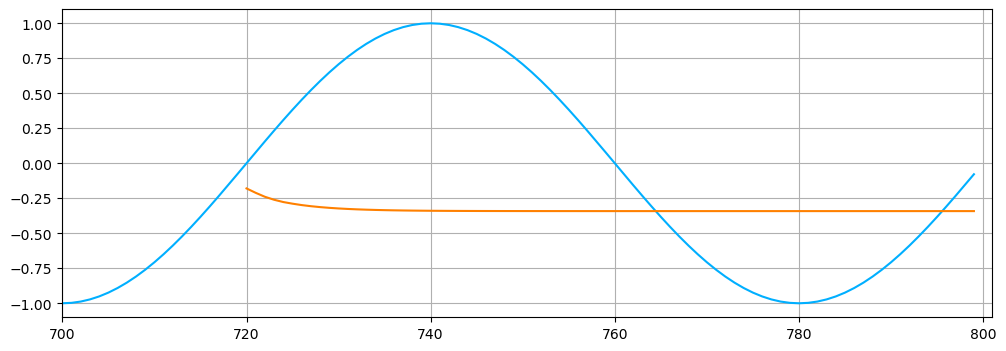

Epoch 5 Loss: 0.0016427941154688597
Performance (loss) on test range: 0.5931743383407593


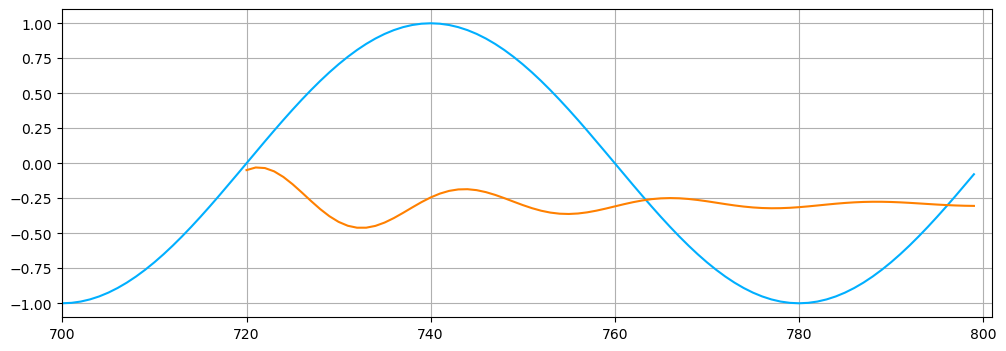

Epoch 10 Loss: 2.1394853888523357e-08
Performance (loss) on test range: 0.3298121690750122


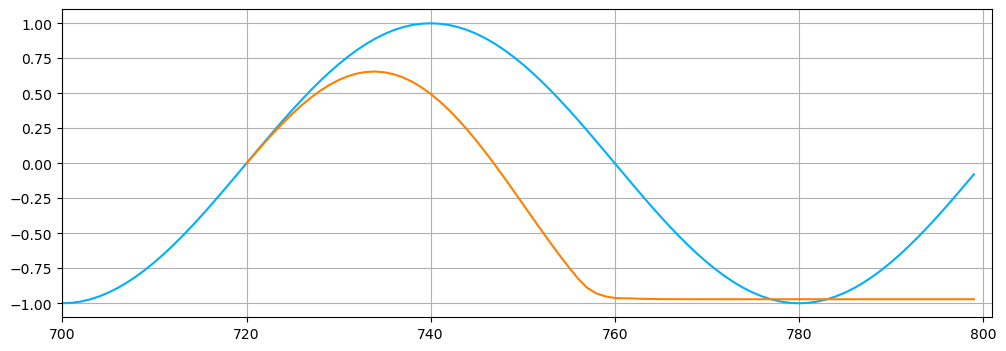

In [ ]:
epochs = 21
future = 80

for i in range(epochs):
    
    # model.hidden = torch.zeros(1,1,model.hidden_size)
    for seq, y_train in train_data:
        optimizer.zero_grad()
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward(retain_graph=True)
        optimizer.step()
        
    if i % 5 == 0: print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = torch.zeros(1,1,model.hidden_size)
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[800-test_size:])
    if i % 5 == 0:
        print(f"Performance (loss) on test range: {loss}")
    
        plt.figure(figsize=(12,4))
        plt.xlim(700,801)
        plt.grid(True)
        plt.plot(y.numpy(),color='#00afff')
        plt.plot(range(800-window_size,800),preds[window_size:],color='#ff8000')
        plt.show()

OK, as you can see in the different plots, the model has learned the sine function by fitting its internal parameters to the outputs of the dataset we built.

Of course, this is a perfect situation for a model like this, but you now know how to build an RNN model and you can test it with different datasets, for example, the price stock dataset that we constructed in the time-series part. In advance, you have to know that RNN models are the more basic models in AI to work with time-series; there are more complex models like LSTM, GRU or transformers, which you probably will want to have a look at if you want to learn more about time-series forecasting.

## 4. Challenging your new RNN Skills

And now that you know how this technology works... why don't you test it?

Here are some ideas, but, of couse, feel free to test and change the code!! It's fun and it's the best way to deeply understand it.

1. Test with different learning rates and epochs.
2. Change the window size to see how the past is important in the prediction, and if the model uses it.
3. Run the RNN model over different time series (test it with stationary and non stationary series to see how it works better).
4. ...

Let's go!!!

Hoping you've had a good time and have learned a bit about this incredible technology!!